In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)),X]


print(X_b)

[[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]
 [1.         1.19731697]
 [1.         0.31203728]
 [1.         0.31198904]
 [1.         0.11616722]
 [1.         1.73235229]
 [1.         1.20223002]
 [1.         1.41614516]
 [1.         0.04116899]
 [1.         1.9398197 ]
 [1.         1.66488528]
 [1.         0.42467822]
 [1.         0.36364993]
 [1.         0.36680902]
 [1.         0.60848449]
 [1.         1.04951286]
 [1.         0.86389004]
 [1.         0.58245828]
 [1.         1.22370579]
 [1.         0.27898772]
 [1.         0.5842893 ]
 [1.         0.73272369]
 [1.         0.91213997]
 [1.         1.57035192]
 [1.         0.39934756]
 [1.         1.02846888]
 [1.         1.18482914]
 [1.         0.09290083]
 [1.         1.2150897 ]
 [1.         0.34104825]
 [1.         0.13010319]
 [1.         1.89777107]
 [1.         1.93126407]
 [1.         1.6167947 ]
 [1.         0.60922754]
 [1.         0.19534423]
 [1.         1.36846605]
 [1.         0.88030499]


In [6]:
def batch_GD(X,y,alpha = 0.1, epochs = 1000):
  m = len(y)
  theta = np.random.randn(2,1)
  print(theta)
  for iteration in range(epochs):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients
  return theta

theta_bgd = batch_GD(X,y)
print("Batch Gradient Descent: ",theta_bgd)

[[0.01300189]
 [1.45353408]]
Batch Gradient Descent:  [[4.21509616]
 [2.77011339]]


In [7]:
def stochastic_GD(X,y,alpha = 0.1, epochs = 1000):
  m = len(y)
  theta = np.random.randn(2,1)
  print(theta)
  for epoch in range(epochs):
    for i in range(m):
      random_index = np.random.randint(m)
      xi = X_b[random_index:random_index+1]
      yi = y[random_index:random_index+1]
      gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
      theta = theta - alpha * gradients
  return theta

theta_sgd = stochastic_GD(X,y)
print("Stochastic Gradient Descent: ",theta_sgd)

[[-0.26465683]
 [ 2.72016917]]
Stochastic Gradient Descent:  [[3.6200518 ]
 [2.46679312]]


In [8]:
def miniB_GD(X,y,alpha = 0.1, epochs = 1000, batch =20):
  m = len(y)
  theta = np.random.randn(2,1)
  print(theta)
  for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,batch):
      xi = X_shuffled[i:i+batch]
      yi = y_shuffled[i:i+batch]
      gradients = (2/len(xi)) * xi.T.dot(xi.dot(theta) - yi)
      theta = theta - alpha * gradients
  return theta

theta_mbgd = miniB_GD(X,y)
print("Mini Batch Gradient Descent: ",theta_mbgd)

[[-0.68826618]
 [ 0.18328872]]
Mini Batch Gradient Descent:  [[4.20311044]
 [2.75757629]]


[[0]
 [2]]


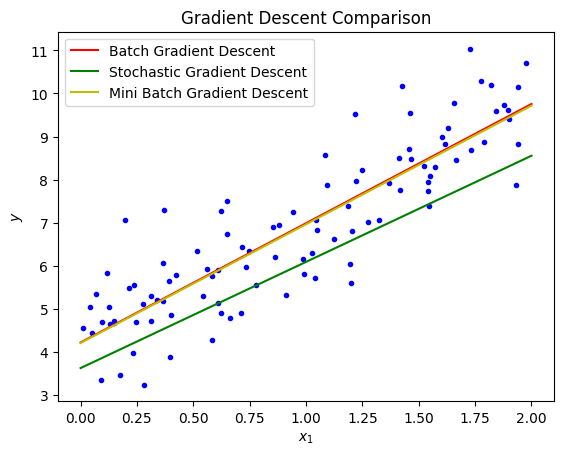

In [9]:
def plot_GD(X,y,theta_bgd,thetha_sgd,theta_mbgd):
  plt.plot(X,y,"b.")
  X_new = np.array([[0],[2]])
  X_new_b = np.c_[np.ones((2,1)),X_new]
  print(X_new)

  y_predict_bgd = X_new_b.dot(theta_bgd)
  y_predict_sgd = X_new_b.dot(theta_sgd)
  y_predict_mbgd = X_new_b.dot(theta_mbgd)

  plt.plot(X_new,y_predict_bgd,"r-",label="Batch Gradient Descent")
  plt.plot(X_new,y_predict_sgd,"g-",label="Stochastic Gradient Descent")
  plt.plot(X_new,y_predict_mbgd,"y-",label="Mini Batch Gradient Descent")
  plt.xlabel("$x_1$")
  plt.ylabel("$y$")
  plt.legend(loc = "upper left")
  plt.title("Gradient Descent Comparison")
  plt.show()

plot_GD(X,y,theta_bgd,theta_sgd,theta_mbgd)